# 📞 Telecom Customer Churn Prediction  and Task~2 Digipex AI Internship

This notebook aims to build a predictive model that helps identify telecom customers likely to churn.
Customer churn is a major challenge for telecom companies, and predicting churn enables them to act proactively.

# 🎯 Goal
---> Build a Machine Learning model to predict if a customer will leave (churn) a telecom company.

# 💡 Why It Matters?
---> Telecom companies lose revenue when customers leave and predicting churn helps them take action early and retain valuable users.

# ❓ Problem Statement
---> I’m supporting the Customer Experience Team to:

✅ Predict which customers are likely to churn

✅ Identify key reasons behind churn

✅ Suggest strategies to reduce churn

📂 Dataset Used
Sourced from Kaggle – https://www.kaggle.com/datasets/blastchar/telco-customer-churn


# 🧮 Dataset Highlights :

👥 01. Customer Info : Gender, Senior Citizen, Dependents

🧾 02. Account Info : Tenure, Payment Method, Contract Type

📡 03. Services Used : Internet, Phone, Streaming

🎯 04. Target : Churn (Yes/No)

# 🔧 Steps to Follow
📥 01. Load & Explore Data

🧹 02. Clean & Preprocess

📊 03. Visualize Patterns

🤖 04. Build ML Models

🧠 05. Interpret with SHAP/LIME

📈 06. Deliver Business Insights

# 🔹 Step-1 : Import the all libraries of python which are required for the model.

In [ ]:
# Import the python all libraries which are required for this model.

# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Imbalanced Data
from imblearn.over_sampling import SMOTE

# Interpretability
import shap

# Warnings
import warnings
warnings.filterwarnings('ignore')


# 🔹Step-2 : Load and Explore the Dataset of Telecom Customer Churn

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 🔹 Step-3 :  Exploratory Data Analysis (EDA) 📊 Visualize and Analyze

1. Tenure distribution, churn rate, and service usage patterns

2. Use plots like histograms, bar plots, pie charts, etc.

3. Key task: Find patterns in churn (e.g., who leaves and why)

# 🔍 Data Analysis Part :
---> Analysis the dataset like use the pandas and numpy libraries to analysis the  unclean dataset like Convert 'TotalCharges' to numeric

In [ ]:
# Basic Information
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#This will display the summary information about the DataFrame, including column names, non-null counts, and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#This will output count, mean, std, min, max, and quartiles for all numeric columns in the DataFrame.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 📊 Data Visualization Part :
---> Visualize the all Graphs such as Count Plot, Bar Plot, Hist Plot, Box Plot, Line Plot, Heatmap Plot and Pie Plot

# 📊 01. Count Plot :  Churn Distribution
✅ Purpose: Shows how many customers churned vs stayed. 🔍 Insight : This helps understand if the data is imbalanced. Usually, there are more non-churned customers than churned. 💡 Use in Business : Helps assess the urgency and scale of churn problems, allowing businesses to prioritize customer retention strategies and allocate resources effectively.

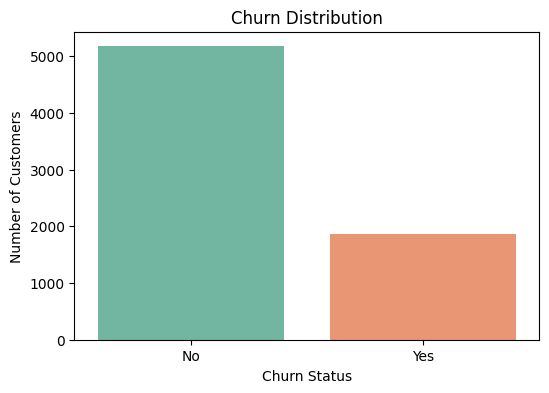

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

# 📊 02. Bar Plot Churn by Contract Type
✅ Purpose: To compare churn distribution across different contract types. 📌 Insight: Reveals which contract types (Month-to-month, One year, Two year) have higher churn rates, typically showing that month-to-month customers churn more.💡 Use in Business: Helps identify risky contract models and encourages shifting customers to longer, more stable contracts to reduce churn.

Text(0.5, 1.0, 'Churn by Contract Type')

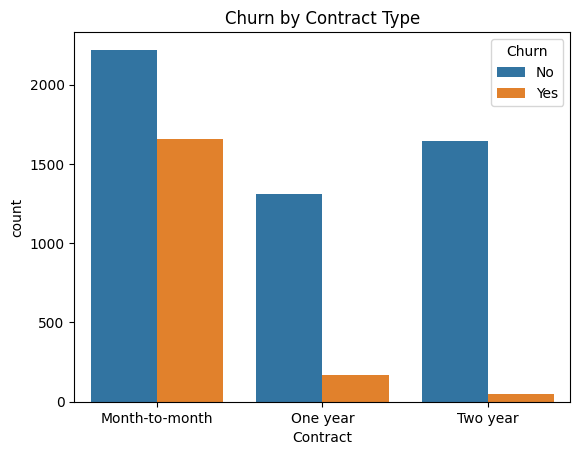

In [ ]:
# Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')

# 📊 03. Histogram Graph : Tenure vs Churn
 ✅ Purpose: To visualize how churn varies across customer tenure duration. 📌 Insight: Shows that customers with shorter tenure are more likely to churn, while long-term customers tend to stay.💡 Use in Business: Helps focus retention efforts on new or short-tenure customers who are at higher risk of churning.

Text(0.5, 1.0, 'Tenure vs Churn')

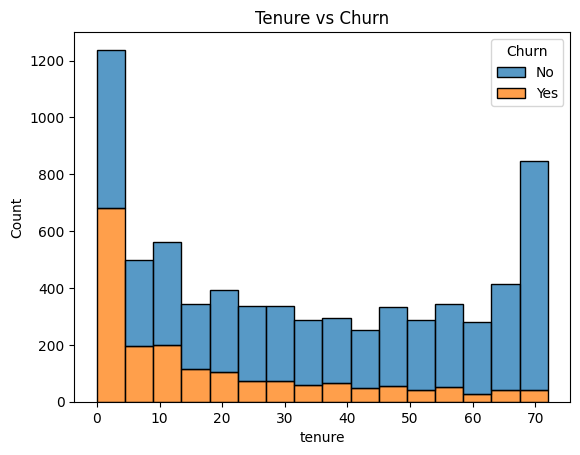

In [ ]:
# Churn vs Tenure
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure vs Churn')

# 📊 05. Histogram Graph : Distribution of Customer Tenure
✅ Purpose : To understand how long customers typically stay with the company before they churn or remain loyal. 📌 Insights : A high concentration at lower tenure values may indicate customers churn early. A gradual drop-off in tenure shows customer retention issues over time. Peaks or gaps in the histogram can indicate specific time periods where churn is higher/lower. 💡 Use in Business : Helps determine critical points in the customer lifecycle when interventions (e.g., offers) are needed.



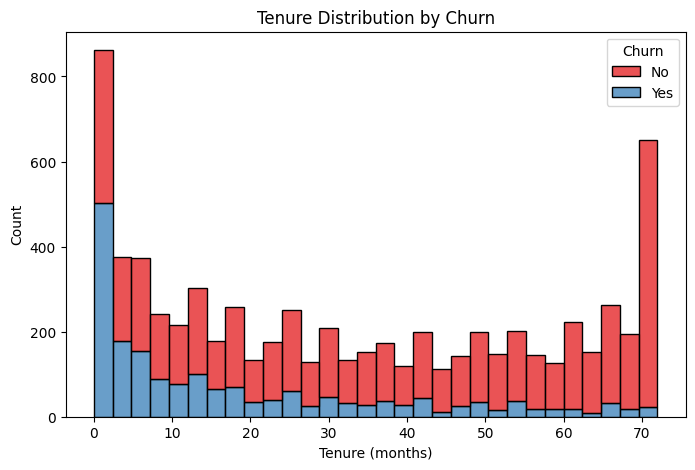

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack', palette='Set1')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()


# 📊 05. Bar Plot : Internet Service Type vs Churn
✅ Purpose:To see the distribution of churned vs non-churned customers. 📌 Insight: Visualizes how different internet services are associated with churn. For example, DSL or Fiber users may churn more.💡 Use in Business: Helps prioritize churn reduction efforts and customer retention strategies.

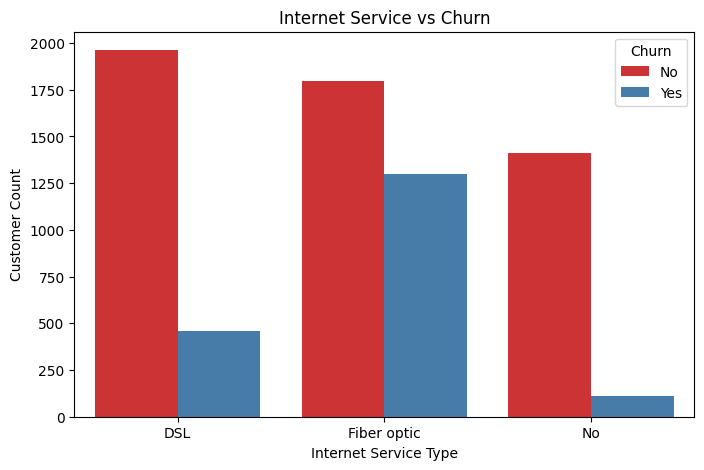

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set1')
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Customer Count')
plt.show()


# 📊 06. Box Plot : Monthly Charges vs Churn
✅ Purpose : To analyze how monthly charges influence churn. 📌 Insights : Churned customers tend to have higher monthly charges. Outliers indicate customers with very high bills, possibly leading to dissatisfaction.💡 Use in Business : Implement pricing optimization and discount strategies for high-paying customers.

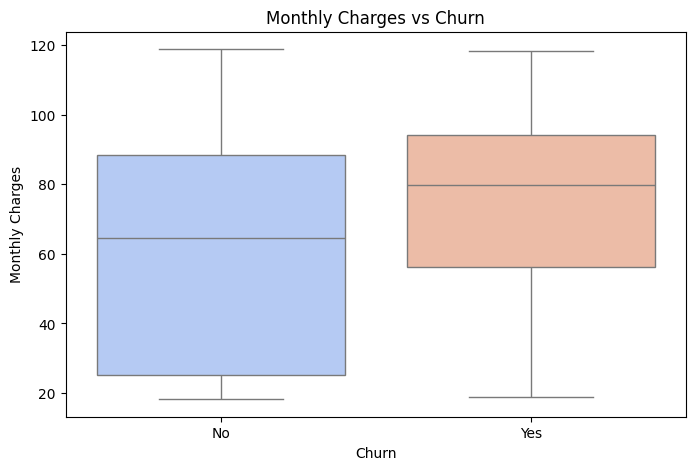

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# 📈 07. Line Plot : Average Monthly Charges Over Tenure
✅ Purpose : Tracks how average billing changes with tenure.📌 Insights : Bills may start high and decline, or vice versa.Helps spot if new customers are charged more (leading to early churn) or if bills increase with usage.💡 Use in Business : Helps in designing billing models that encourage long-term customer retention.

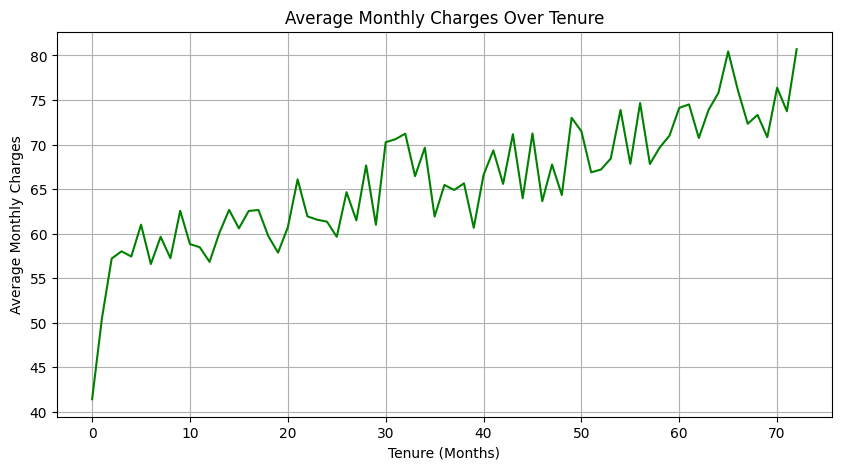

In [ ]:
avg_charges = df.groupby('tenure')['MonthlyCharges'].mean()
plt.figure(figsize=(10, 5))
avg_charges.plot(kind='line', color='green')
plt.title('Average Monthly Charges Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Average Monthly Charges')
plt.grid(True)
plt.show()

# 🔲 08. Heatmap Graph : Correlation Matrix
✅ Purpose : Shows correlation between numeric features.📌 Insights : Positive/negative correlations help in selecting features for machine learning.For example, tenure might have a negative correlation with churn, meaning long-term customers are less likely to leave.💡 Use in Business : Helps identify which features most influence churn and guide business decisions.

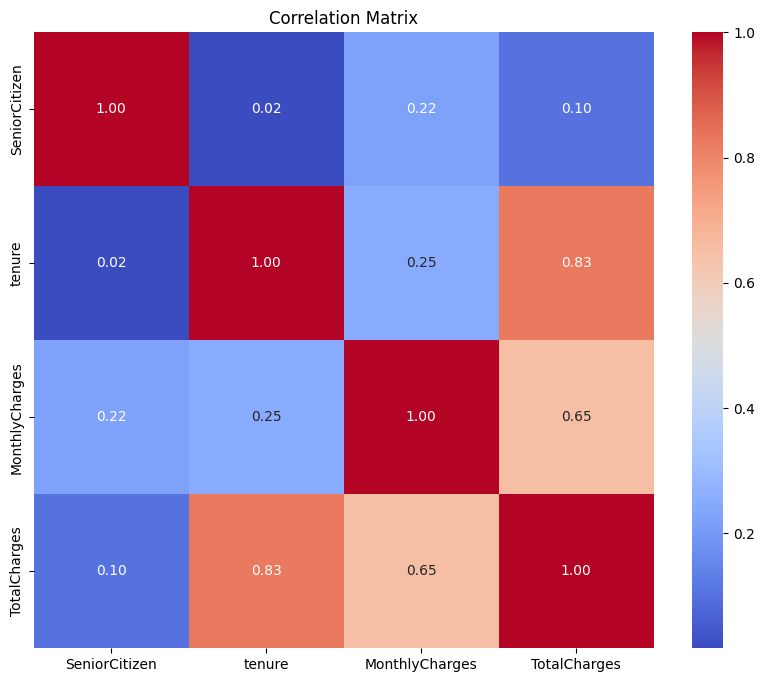

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 🟪 09. Count Plot : Contract Type vs Churn
✅ Purpose : To analyze the effect of contract type(Month-to-month, One year, Two year) on churn. 📌 Insights : Month-to-month contracts show higher churn rates.Two-year contracts have very low churn, likely due to commitment or penalty clauses.💡 Use in Business : Promote longer contracts through discounts to reduce churn.

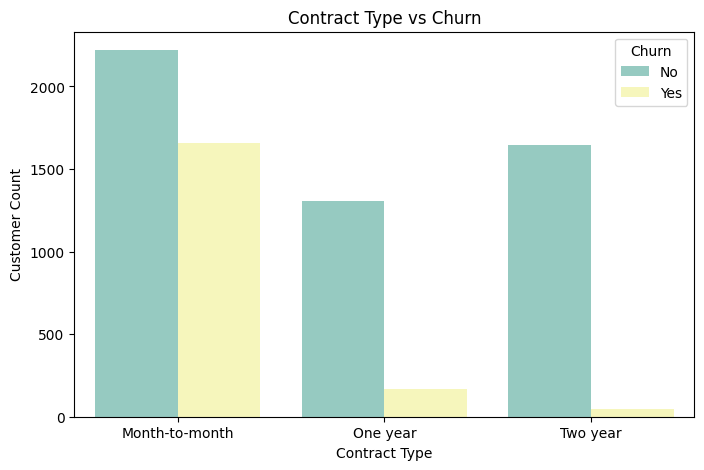

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set3')
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.show()


# 🛡️ 10. Pie Chart : Online Security
✅ Purpose : To visualize how many customers have or lack online security services. 📌 Insights : Shows demand for online security services.Lack of security might influence churn behavior.💡 Use in Business : Helps in promoting or improving the online security feature to reduce churn and enhance customer satisfaction.

🔹 Step-3 : Data Preprocessing

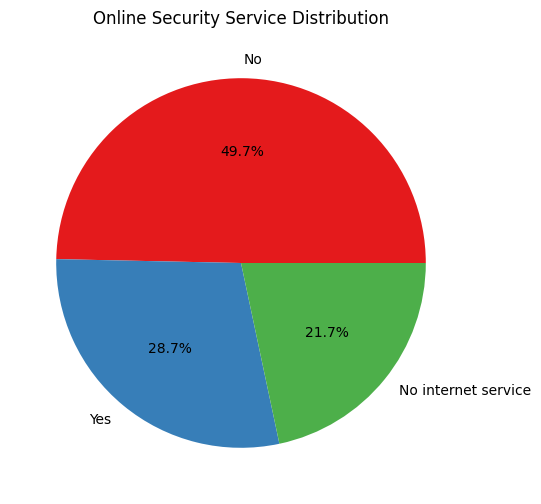

In [ ]:
security_counts = df['OnlineSecurity'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(security_counts, labels=security_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Online Security Service Distribution')
plt.show()


# 📊 Telecom Customer Churn Visualization Dashboard All Graphs
1. Churn Distribution
📌 Insight: Shows how many customers churned vs. stayed.
✅ Purpose: Understand the overall churn rate.
💡 Business Use: Highlights the need for retention strategies if churn is high.

2. Tenure Distribution by Churn
📌 Insight: Short-tenure customers are more likely to churn.
✅ Purpose: Analyze churn behavior over customer lifetime.
💡 Business Use: Focus retention efforts on new or short-term customers.

3. Churn by Internet Service
📌 Insight: Fiber optic users churn more than DSL or non-users.
✅ Purpose: Compare churn trends across internet service types.
💡 Business Use: Improve service quality for high-risk groups.

4. Churn by Contract Type
📌 Insight: Month-to-month contracts have the highest churn rate.
✅ Purpose: Show churn distribution by contract length.
💡 Business Use: Promote longer contracts to stabilize customer base.

5. Monthly Charges Distribution by Churn
📌 Insight: Customers with higher monthly charges tend to churn more.
✅ Purpose: Examine the impact of pricing on churn.
💡 Business Use: Offer better value or discounts to high-paying customers.

6. Churn by Payment Method
📌 Insight: Customers using electronic checks show higher churn rates.
✅ Purpose: Understand how payment types relate to churn.
💡 Business Use: Encourage auto-pay or credit options to retain customers.

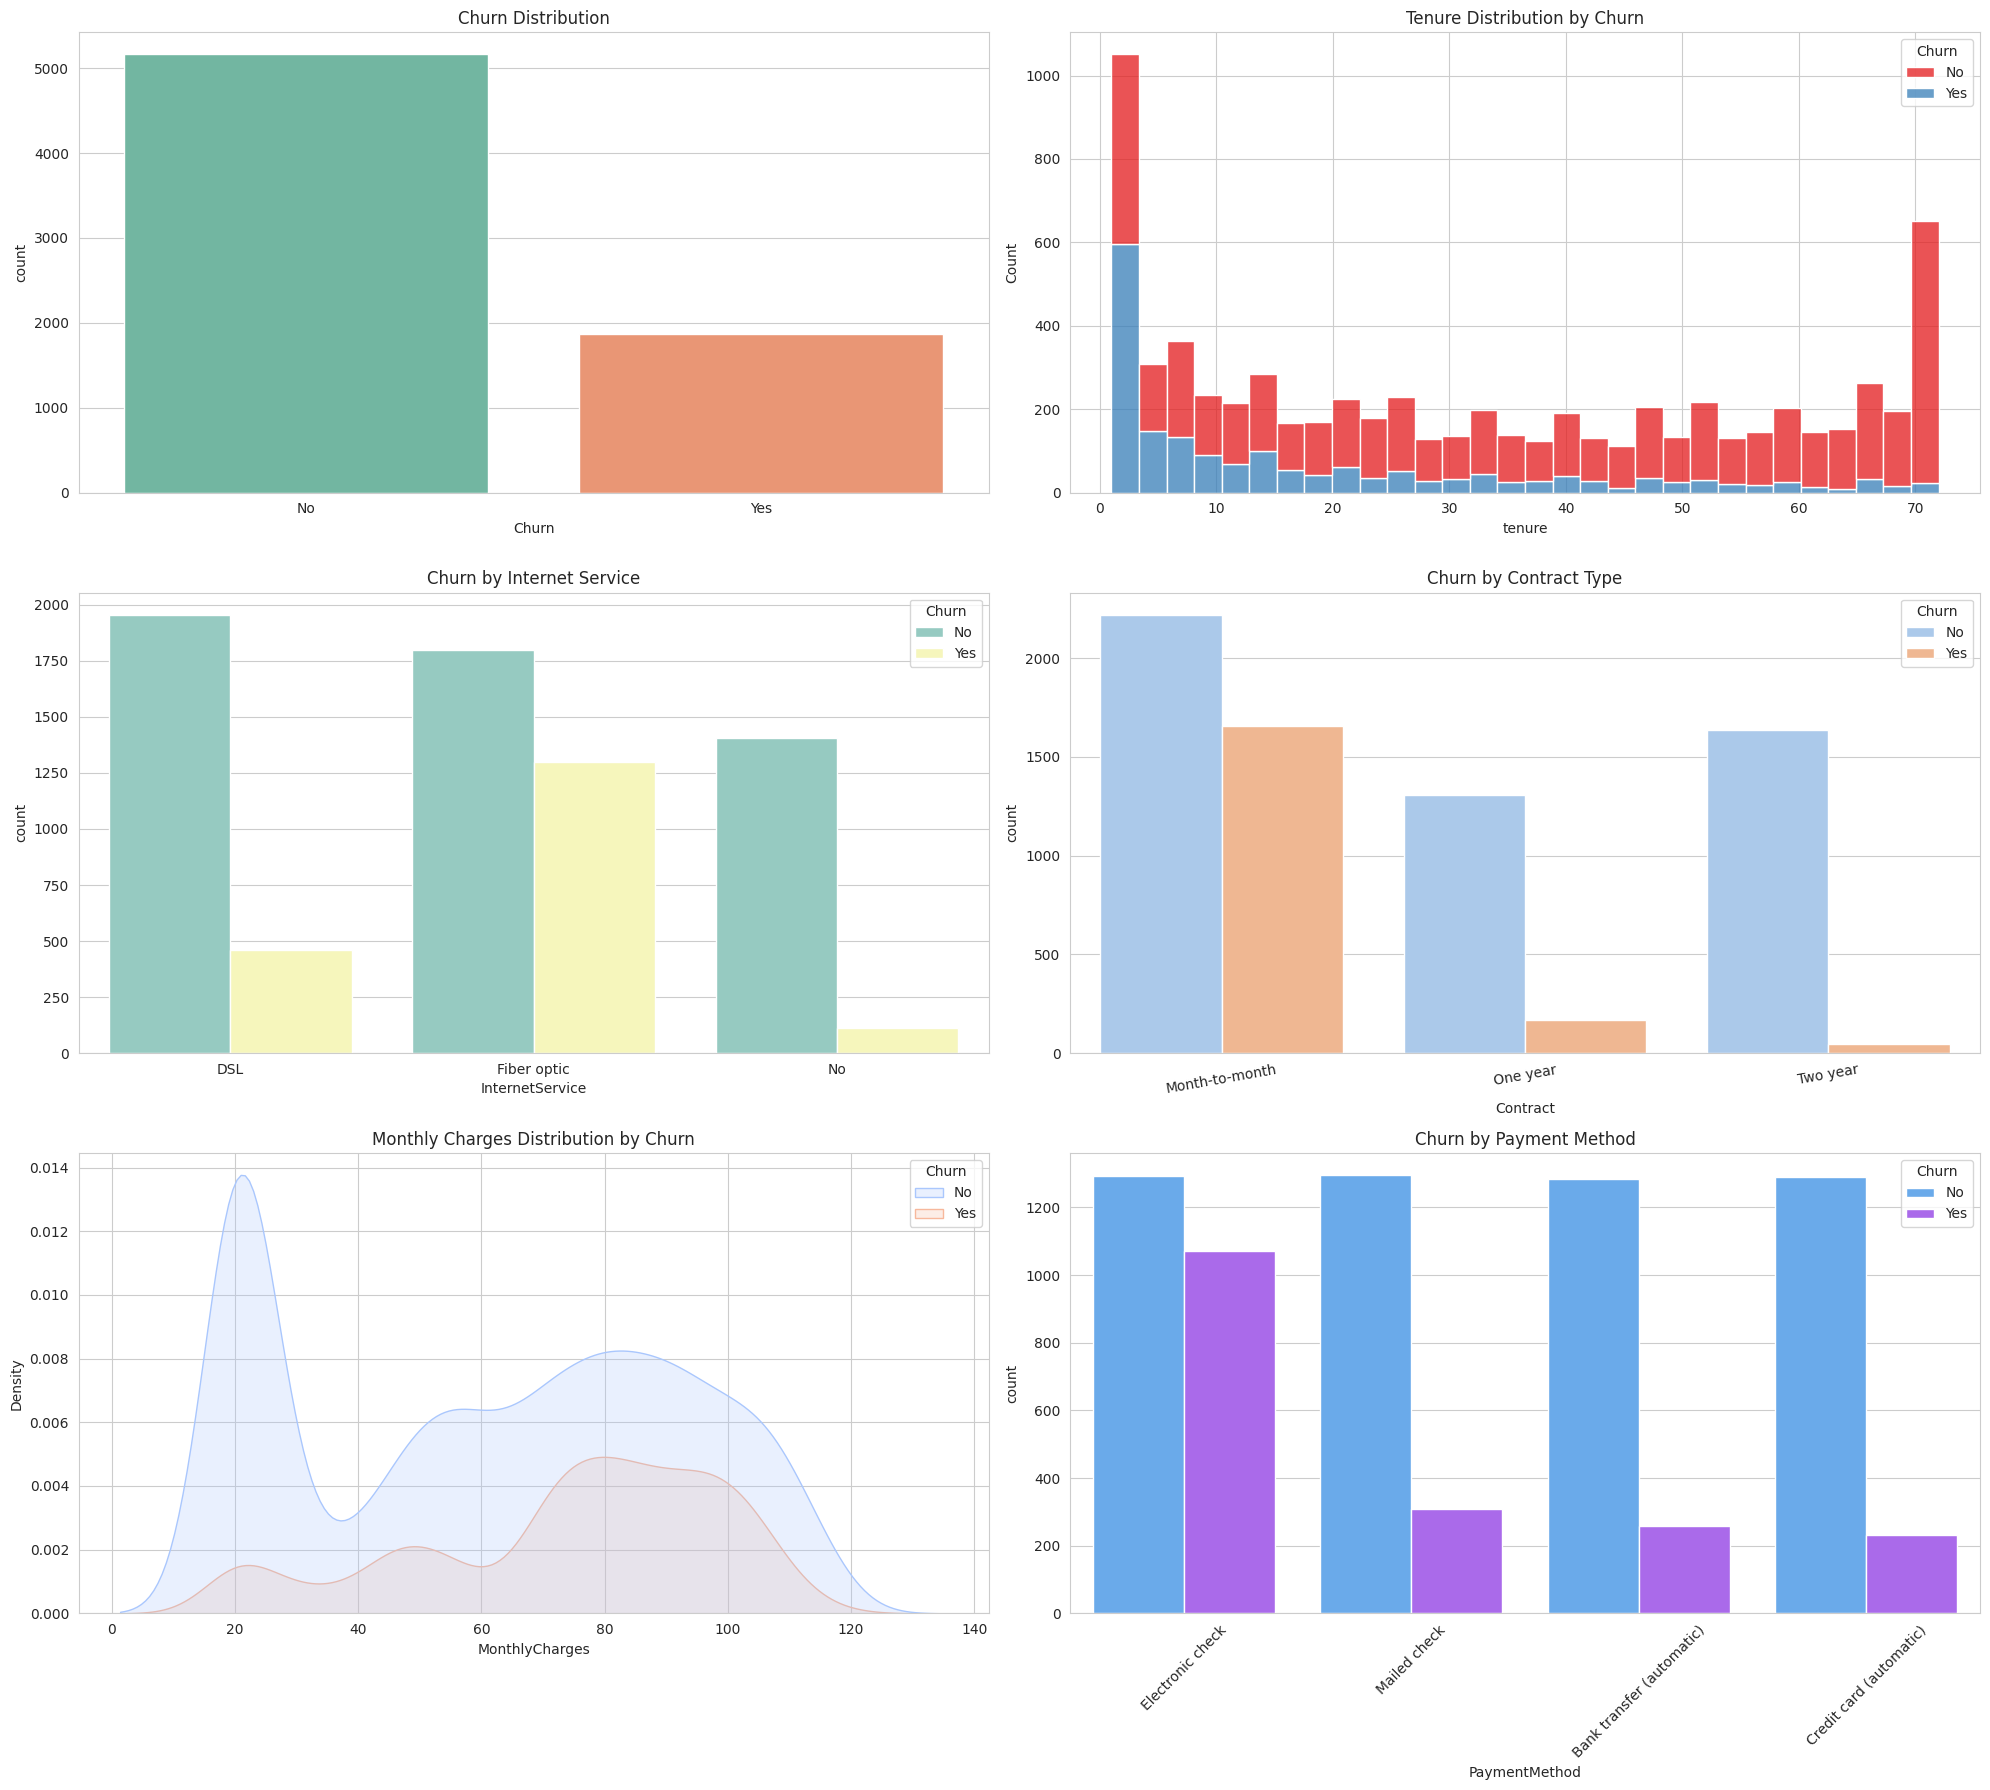

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Clean TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Plot styling
sns.set_style("whitegrid")
plt.figure(figsize=(20, 18))

# 1. Churn Distribution
plt.subplot(3, 2, 1)
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")

# 2. Tenure Distribution by Churn
plt.subplot(3, 2, 2)
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack', palette='Set1')
plt.title("Tenure Distribution by Churn")

# 3. Internet Service vs Churn
plt.subplot(3, 2, 3)
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set3')
plt.title("Churn by Internet Service")

# 4. Contract Type vs Churn
plt.subplot(3, 2, 4)
sns.countplot(x='Contract', hue='Churn', data=df, palette='pastel')
plt.title("Churn by Contract Type")
plt.xticks(rotation=10)

# 5. Monthly Charges Distribution
plt.subplot(3, 2, 5)
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette='coolwarm')
plt.title("Monthly Charges Distribution by Churn")

# 6. Payment Method vs Churn
plt.subplot(3, 2, 6)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='cool')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)

# Show all plots
plt.tight_layout()
plt.show()


# 🔹 Step-4 : 🧹 Data Preprocessing for Clean & Prepare Dataset

1. Handle missing values

2. Encode categorical columns using Label Encoding or One-Hot Encoding

3. Scale numeric features (e.g., tenure, charges)

4. Fix class imbalance using: SMOTE (Synthetic Minority Over-sampling Technique) and Class weighting in models

In [ ]:
# Handle missing values
df.dropna(inplace=True)

# Drop 'customerID'
df.drop('customerID', axis=1, inplace=True)

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Features & Labels
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# 🔹 Step-5 : Model Development 🤖 Train ML Models
---> Train at least 3 models (must include a tree-based model like Random Forest or XGBoost)

Evaluate models using :

1. Accuracy

2. Precision

3. Recall

4. F1-Score

# ⚙️ Model-1 : Logistic Regression

In [ ]:
# Model 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1037
           1       0.76      0.82      0.79      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



# ⚙️ Model-2 : Random Forest

In [ ]:
# Model 2: Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1037
           1       0.85      0.85      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



# ⚙️ Model-3 : XGBoost

In [ ]:
# Model 3: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

XGBoost:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1037
           1       0.84      0.84      0.84      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



# 🔹 Step-6 : Model Interpretability with SHAP

🔍 Explain Predictions : Use SHAP or LIME to explain how the model makes decisions

1. Identify most important features causing churn

2. Include visual plots (SHAP summary/force plot or LIME explanation)

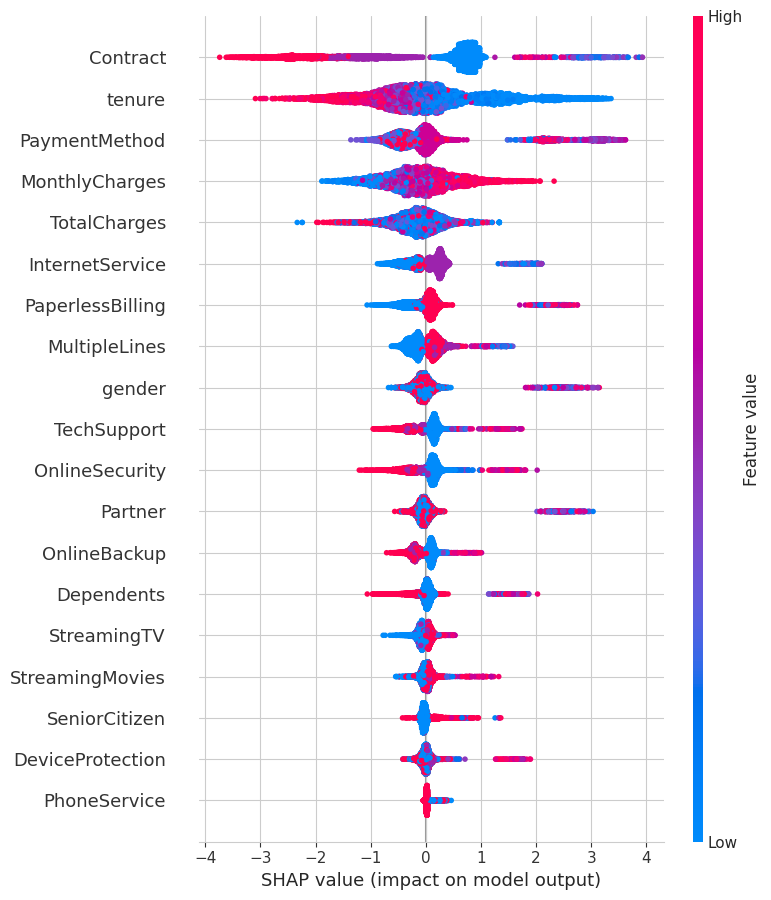

In [ ]:
# SHAP Summary Plot for XGBoost
explainer = shap.Explainer(xgb)
shap_values = explainer(X_train)

# Summary plot
shap.summary_plot(shap_values, features=X_train, feature_names=X.columns)

# 🔹 Step-7 : Business Insights : Example Insights from Model Outputs

In [ ]:
# 1. Customers with month-to-month contracts and high tenure are more likely to churn.
# 2. Electronic check payment method is strongly associated with churn.
# 3. Senior citizens and those with fiber optic internet are at higher risk.


# 🔑 Recommendations : There are three main Recommendations

1. Offer contract discounts for long-term plans.

2. Educate and support senior customers more.

3. Promote alternative payment methods.